In [1]:
'''
!pip install prophet
!pip install plotly
'''

'\n!pip install prophet\n!pip install plotly\n'

In [139]:
# Importando as bibliotecas
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('train.csv', low_memory=False)

In [141]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [142]:
# Variável que receberá o input da seleção da loja do usuário
i = 1

In [143]:
# Selecionando os dados apenas de uma loja
df = df.loc[df.Store == i]

In [144]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1


In [145]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [146]:
# Transformando data para datetime
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_30579/3706645630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [147]:
df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [148]:
df['StateHoliday'].value_counts()

StateHoliday
0    915
a     17
b      6
c      4
Name: count, dtype: int64

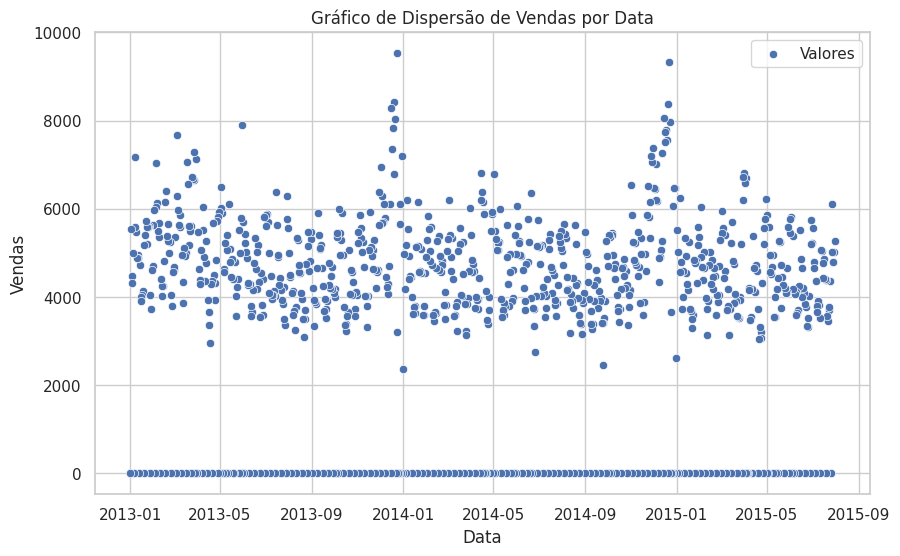

In [149]:
# Imprimindo o gráfico de dispersão de vendas por data
color_pal = sns.color_palette()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Sales', data=df, color=color_pal[0], label='Valores')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Gráfico de Dispersão de Vendas por Data')
plt.legend()
plt.show()

In [150]:
df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

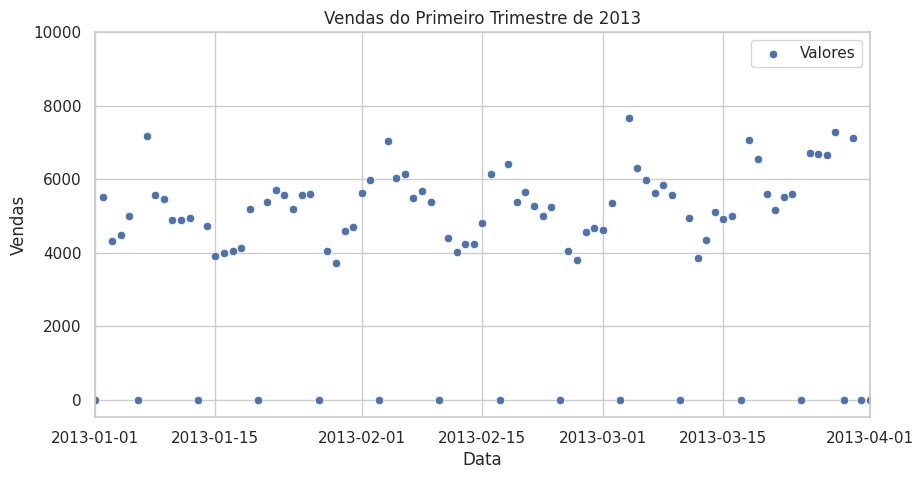

In [152]:
# Plotando as vendas do primeiro trimestre de 2013
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Date', y='Sales', data=df, color='b', label='Valores')
plt.xlim(pd.Timestamp('2013-01-01'), pd.Timestamp('2013-04-01'))
plt.title('Vendas do Primeiro Trimestre de 2013')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()

plt.show()

In [102]:
# Dividindo em treino e teste 
split_date = '01-01-2015'
df_train = df.loc[df.Date <= split_date].copy()
df_validation = df.loc[df.Date > split_date].copy()

/tmp/ipykernel_30579/1255013301.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validation_plot.rename(columns={'Sales': 'Validation Set'}, inplace=True)
/tmp/ipykernel_30579/1255013301.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_plot.rename(columns={'Sales': 'Training Set'}, inplace=True)


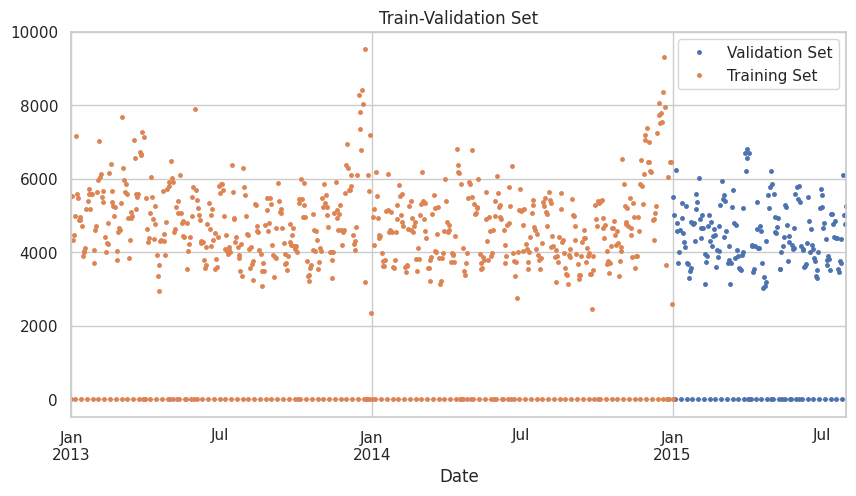

In [103]:
# Plotando o treino e teste
columns = ['Date', 'Sales']
df_train_plot = df_train[columns]
df_validation_plot = df_validation[columns]

# Set 'Date' as the index for both DataFrames
df_validation_plot.set_index('Date', inplace=True)
df_train_plot.set_index('Date', inplace=True)

# Rename the 'Sales' columns for better visualization in the plot
df_validation_plot.rename(columns={'Sales': 'Validation Set'}, inplace=True)
df_train_plot.rename(columns={'Sales': 'Training Set'}, inplace=True)

# Join the two DataFrames on the 'Date' index using outer join
merged_df = df_test_plot.join(df_train_plot, how='outer')

# Plot the data
merged_df.plot(figsize=(10, 5), title='Train-Validation Set', style='.', ms=5)

plt.show()

In [98]:
df['StateHoliday'].value_counts()

StateHoliday
0    915
a     17
b      6
c      4
Name: count, dtype: int64

In [99]:
# Criando o DataFrame Holiday

# Public Holiday
public_holiday=df[df['StateHoliday']=='a']

public = pd.DataFrame({
  'holiday': 'public',
  'ds': public_holiday['Date'],
  'lower_window': 0,
  'upper_window': 0,
})

# Easter Holiday
easter_holiday=df[df['StateHoliday']=='b']

easter = pd.DataFrame({
  'holiday': 'easter',
  'ds': easter_holiday['Date'],
  'lower_window': 0,
  'upper_window': 0,
})

# Christmas Holiday
christmas_holiday=df[df['StateHoliday']=='c']

christmas = pd.DataFrame({
  'holiday': 'christmas',
  'ds': christmas_holiday['Date'],
  'lower_window': -1,
  'upper_window': 0,
})

# School Holiday
school_holiday=df[df['SchoolHoliday']==1]

school = pd.DataFrame({
  'holiday': 'school',
  'ds': school_holiday['Date'],
  'lower_window': 0,
  'upper_window': 0,
})

holidays=pd.concat((public, easter, christmas, school))

In [100]:
holidays

,holiday,ds,lower_window,upper_window
63555,public,2015-06-04,0,0
74705,public,2015-05-25,0,0
86970,public,2015-05-14,0,0
101465,public,2015-05-01,0,0
235265,public,2015-01-01,0,0
...,...,...,...,...
1011635,school,2013-01-05,0,0
1012750,school,2013-01-04,0,0
1013865,school,2013-01-03,0,0
1014980,school,2013-01-02,0,0


In [104]:
# Ajustando os parâmetros nos moldes do prophet
df_train_prophet = df_train.reset_index() \
    .rename(columns={'Date':'ds',
                     'Sales':'y'})

# Treinando o modelo com os dados de treino
model = Prophet(holidays=holidays, weekly_seasonality=True)
model.fit(df_train_prophet)

14:11:54 - cmdstanpy - INFO - Chain [1] start processing
14:11:55 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
# Predict on test set with model
df_validation_prophet = df_validation.reset_index() \
    .rename(columns={'Date':'ds',
                     'Sales':'y'})

# Testando com os dados de teste
forecast_validation = model.predict(df_validation_prophet)

In [113]:
forecast_validation[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-02,5397.974318,4447.855826,6400.989509
1,2015-01-03,5459.866033,4457.380739,6523.579826
2,2015-01-04,344.017840,-727.884454,1410.271290
3,2015-01-05,5478.134085,4507.318574,6543.044507
4,2015-01-06,4885.438534,3823.795912,5888.778712
5,2015-01-07,4687.483963,3677.334975,5676.562623
6,2015-01-08,4517.210462,3471.877412,5535.865157
7,2015-01-09,4729.305496,3732.785691,5644.957086
8,2015-01-10,4738.354821,3549.153320,5712.873044
9,2015-01-11,-310.182857,-1310.557085,741.313279


In [114]:
df_test

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
229690,1,2,2015-01-06,4574,595,1,1,0,1
230805,1,1,2015-01-05,6239,712,1,1,0,1
231920,1,7,2015-01-04,0,0,0,0,0,1
233035,1,6,2015-01-03,5023,645,1,0,0,1


In [115]:
help(Prophet.plot)

Help on function plot in module prophet.forecaster:

plot(self, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y', figsize=(10, 6), include_legend=False)
    Plot the Prophet forecast.
    
    Parameters
    ----------
    fcst: pd.DataFrame output of self.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, height in inches.
    include_legend: Optional boolean to add legend to the plot.
    
    Returns
    -------
    A matplotlib figure.



/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


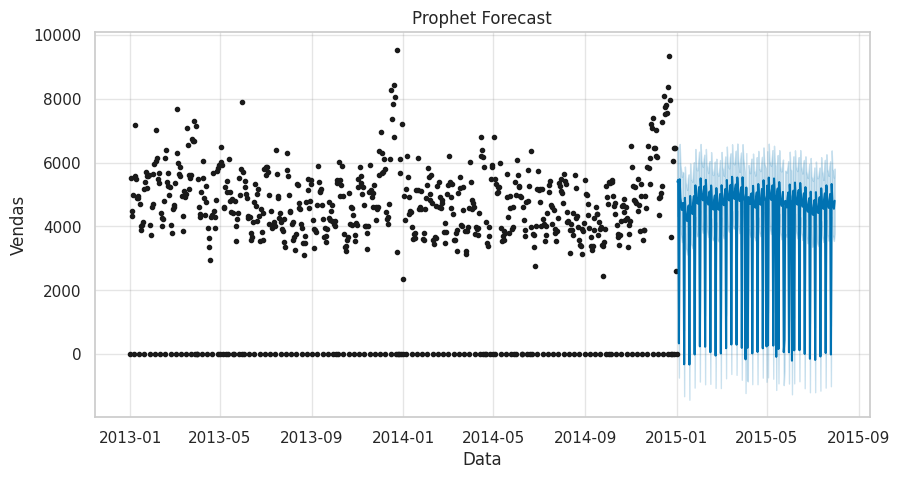

In [116]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(forecast_test, uncertainty= True, ax=ax)
ax.set_title('Prophet Forecast')
plt.ylabel('Vendas')
plt.xlabel('Data')
plt.show()

/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain th

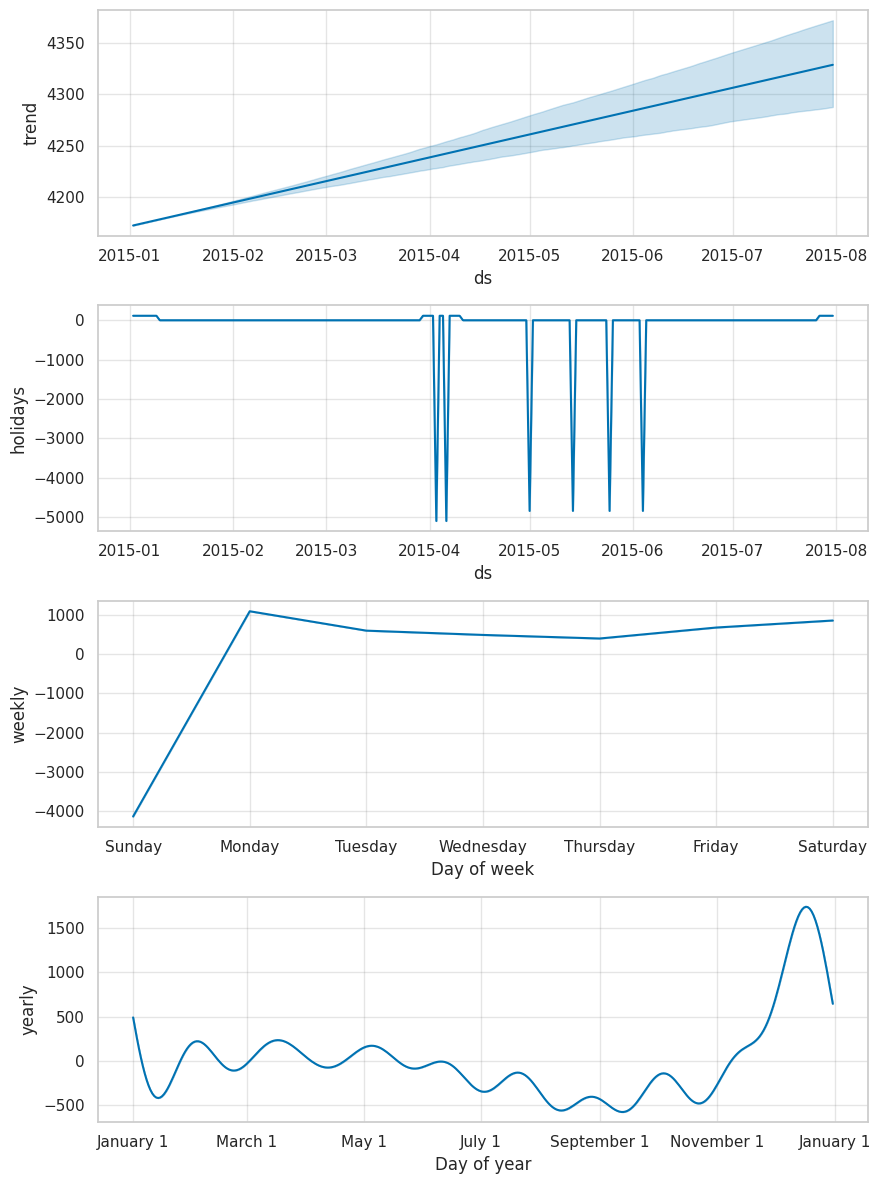

In [117]:
fig = model.plot_components(forecast_validation)
plt.show()

In [153]:
# Verificando qual dia da semana a loja não abre, no caso é no Domingo
df.loc[df.Sales == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5575,1,7,2015-07-26,0,0,0,0,0,0
13380,1,7,2015-07-19,0,0,0,0,0,0
21185,1,7,2015-07-12,0,0,0,0,0,0
28990,1,7,2015-07-05,0,0,0,0,0,0
36795,1,7,2015-06-28,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
987105,1,7,2013-01-27,0,0,0,0,0,0
994910,1,7,2013-01-20,0,0,0,0,0,0
1002715,1,7,2013-01-13,0,0,0,0,0,0
1010520,1,7,2013-01-06,0,0,0,0,0,1


/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


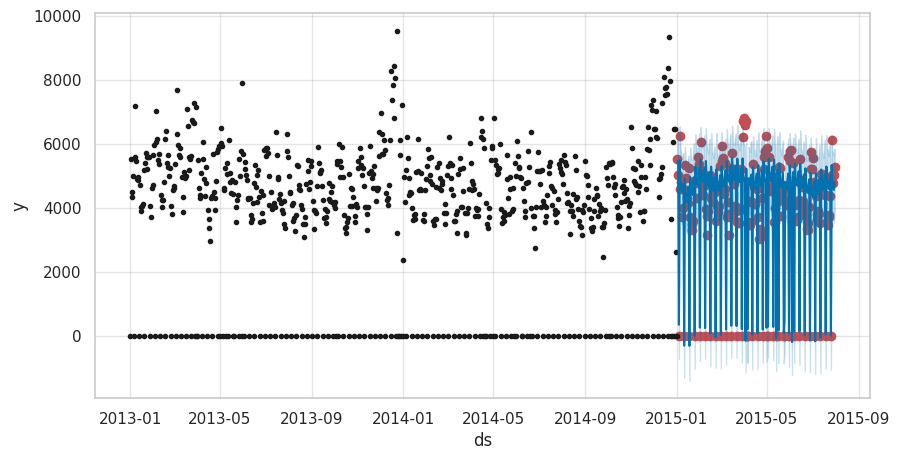

In [118]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_validation['Date'], df_validation['Sales'], color='r')
fig = model.plot(forecast_validation, ax=ax)

In [119]:
df_test.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


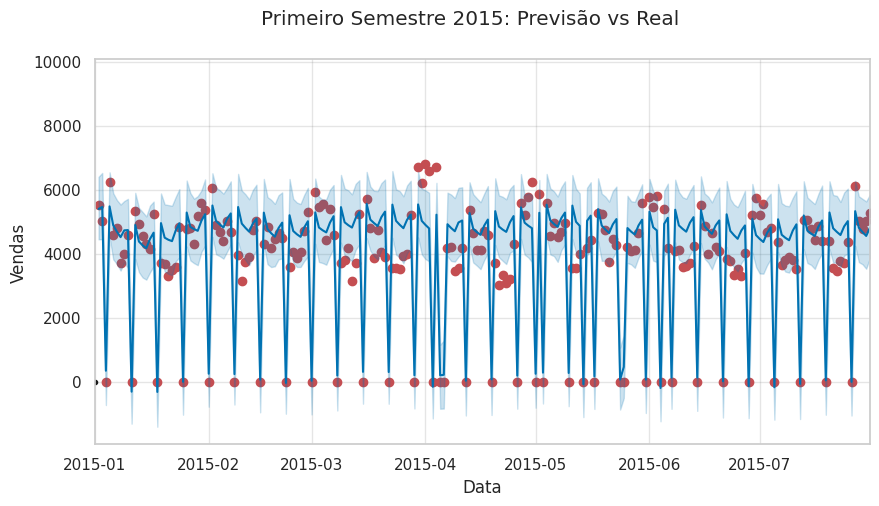

In [129]:
df_validation['ds'] = pd.to_datetime(df_validation['Date'])
forecast_validation['ds'] = pd.to_datetime(forecast_validation['ds'])

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_validation['Date'], df_validation['Sales'], color='r', label='Actuals')
model.plot(forecast_validation, ax=ax)
ax.set_xbound(lower=pd.Timestamp('2015-01-01'), 
              upper=pd.Timestamp('2015-07-31'))
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
plot = plt.suptitle('Primeiro Semestre 2015: Previsão vs Real')
plt.show()

/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/tmp/ipykernel_30579/1413310007.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


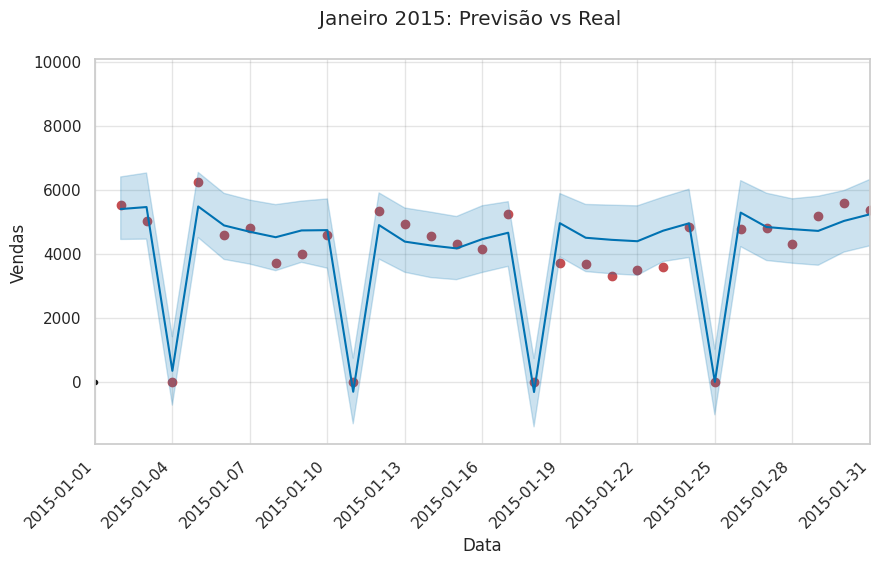

In [131]:
df_validation['ds'] = pd.to_datetime(df_validation['Date'])
forecast_validation['ds'] = pd.to_datetime(forecast_validation['ds'])

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_test['Date'], df_validation['Sales'], color='r', label='Actuals')
model.plot(forecast_validation, ax=ax)
ax.set_xbound(lower=pd.Timestamp('2015-01-01'), 
              upper=pd.Timestamp('2015-01-31'))

ax.set_xlabel('Data')
ax.set_ylabel('Vendas')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plot = plt.suptitle('Janeiro 2015: Previsão vs Real')
plt.show()